# Tutorial 2: finding geodesics that connect two points in a black hole spacetime

In [1]:
import curvedpy as cp
cp.__version__

'0.0.4a1'

In [2]:
import numpy as np
import time 
import matplotlib.pyplot as plt
from PIL import Image

In this tutorial we will use the class *BlackholeGeodesicPointPointIntegrator*. It will calculate geodesics between two points. The class *BlackholeGeodesicIntegrator* from Tutorial 1 calculated a geodesic given a start location and momentum. With these boundary conditions the geodesic equation gives a unique solution. But if you want a geodesic between two points there are infinitely many solutions for a Schwarzschild or Kerr metric. *BlackholeGeodesicPointPointIntegrator* calculates the first three geodesics connecting two points in a Schwarzschild spacetime (Kerr is in developement). 

The different geodesics connecting two points are often referred to as the first, second, etc image. This is because when constructing an image they give rise to multiple images of the same object (this is impossible in Euclidian space ofcourse and not something we humans are used to). The different images are classified as first, second, etc based on the length of their geodesics. The first image is constructed from the shortest geodesics to the image, the second image from geodesics taking a slightly longer route, etc.

In [3]:
# help(cp.BlackholeGeodesicPointPointIntegrator)

Make an integrator object and a function to plot a sphere to represent the event horizon

In [4]:
gi = cp.BlackholeGeodesicPointPointIntegrator()

In [5]:
def plot_sphere(r):
    theta = np.linspace(0, 2 * np.pi, 100)
    phi = np.linspace(0, np.pi, 50)
    theta, phi = np.meshgrid(theta, phi)
    
    # Convert to Cartesian coordinates
    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)
    return x, y, z


## Generating a geodesic between two points

Next we use the *geodesic_pp* function to generate the shortest (image_nr=1) geodesic between the points *x0_xyz* and *xf_xyz*:

Exec. time:  0.6136419773101807


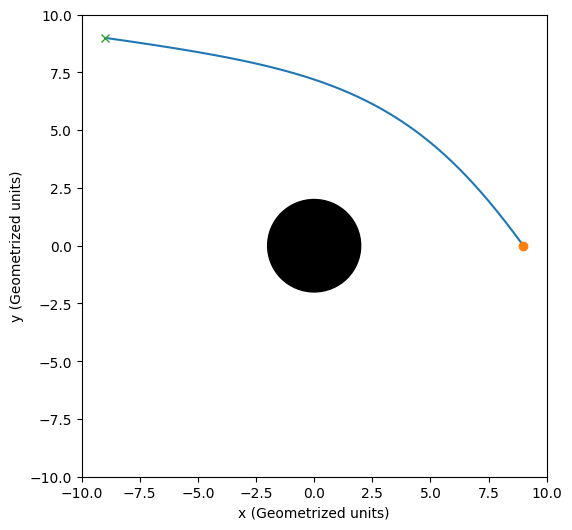

In [6]:
x0_xyz, xf_xyz = np.array([[9,0,0]]), np.array([[-9, 9, 0]])

st = time.time()
l_x_xyz, l_translation_xyz = gi.geodesic_pp(xf_xyz, x0_xyz, image_nr=1)
print("Exec. time: ", time.time()-st)

circle1 = plt.Circle((0, 0), 2, color='k')
fig, ax = plt.subplots(figsize=(6,6))
ax.add_patch(circle1)
plt.plot(l_x_xyz[0][0],l_x_xyz[0][1])
plt.plot(*x0_xyz[0][0:2], "o")
plt.plot(*xf_xyz[0][0:2], "x")

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x (Geometrized units)")
plt.ylabel("y (Geometrized units)")
plt.show()

## Generating the second and third images

We can generate upto three geodesics between two points using the *image_nr* parameter:

Exec. time first image:  0.6078479290008545
Exec. time second image:  0.9738988876342773
Exec. time third image:  2.5394089221954346


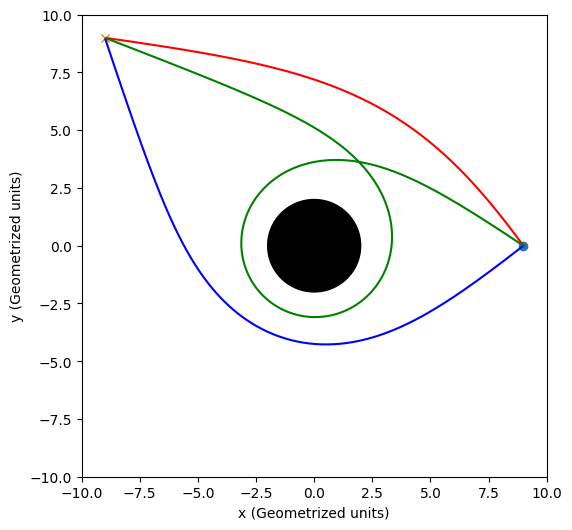

In [7]:
circle1 = plt.Circle((0, 0), 2, color='k')
fig, ax = plt.subplots(figsize=(6,6))
ax.add_patch(circle1)

x0_xyz, xf_xyz = np.array([[9,0,0]]), np.array([[-9, 9, 0]])
plt.plot(*x0_xyz[0][0:2], "o")
plt.plot(*xf_xyz[0][0:2], "x")

st = time.time()
l_x_xyz, l_translation_xyz = gi.geodesic_pp(xf_xyz, x0_xyz, image_nr=1)
print("Exec. time first image: ", time.time()-st)
plt.plot(l_x_xyz[0][0],l_x_xyz[0][1], color="r")

st = time.time()
l_x_xyz, l_translation_xyz = gi.geodesic_pp(xf_xyz, x0_xyz, image_nr=2)
print("Exec. time second image: ", time.time()-st)
plt.plot(l_x_xyz[0][0],l_x_xyz[0][1], color="b")

st = time.time()
l_x_xyz, l_translation_xyz = gi.geodesic_pp(xf_xyz, x0_xyz, image_nr=3)
print("Exec. time third image: ", time.time()-st)
plt.plot(l_x_xyz[0][0],l_x_xyz[0][1], color="g")

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("x (Geometrized units)")
plt.ylabel("y (Geometrized units)")
plt.show()

## Where the photons seem to come from as seen from a camera at *x0_xyz*

Exec. time first image:  0.7751901149749756
Exec. time second image:  1.351477861404419
[[-1.09747605e+01 -4.12123443e+01 -1.77419239e-15]]
Exec. time third image:  2.1680209636688232
[[-2.22418928e+01  8.05515444e+00 -2.46410526e-15]]


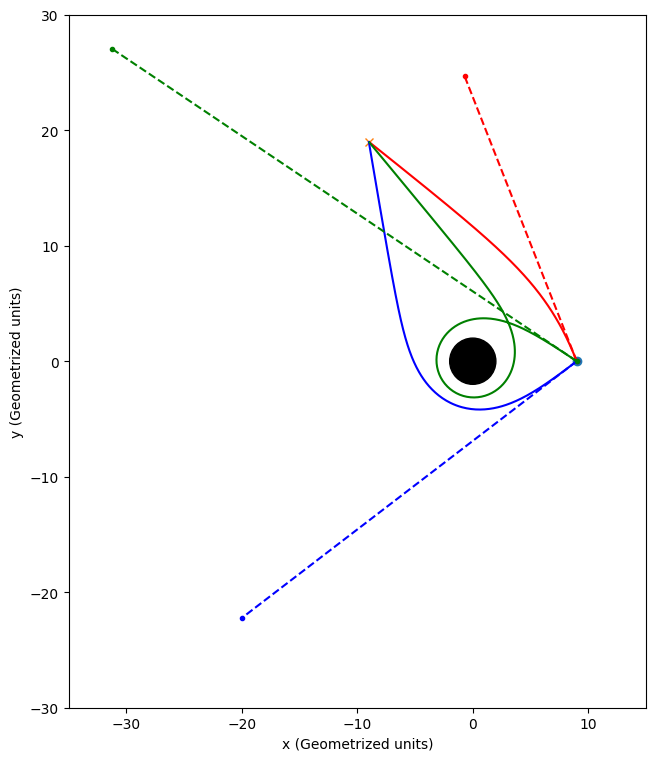

In [14]:
circle1 = plt.Circle((0, 0), 2, color='k')
fig, ax = plt.subplots(figsize=(9,9))
ax.add_patch(circle1)

x0_xyz, xf_xyz = np.array([[9,0,0]]), np.array([[-9, 19, 0]])
plt.plot(*x0_xyz[0][0:2], "o")
plt.plot(*xf_xyz[0][0:2], "x")

st = time.time()
l_x_xyz, l_translation_xyz = gi.geodesic_pp(xf_xyz, x0_xyz, image_nr=1)
print("Exec. time first image: ", time.time()-st)

plt.plot(l_x_xyz[0][0],l_x_xyz[0][1], color="r")
plt.plot([x0_xyz[0][0], xf_xyz[0][0]+l_translation_xyz[0][0]],[x0_xyz[0][1], xf_xyz[0][1]+l_translation_xyz[0][1]], ".--r")

st = time.time()
l_x_xyz, l_translation_xyz = gi.geodesic_pp(xf_xyz, x0_xyz, image_nr=2)
print("Exec. time second image: ", time.time()-st)
plt.plot(l_x_xyz[0][0],l_x_xyz[0][1], color="b")
plt.plot([x0_xyz[0][0], xf_xyz[0][0]+l_translation_xyz[0][0]],[x0_xyz[0][1], xf_xyz[0][1]+l_translation_xyz[0][1]], ".--b")
print(l_translation_xyz)

st = time.time()
l_x_xyz, l_translation_xyz = gi.geodesic_pp(xf_xyz, x0_xyz, image_nr=3)
print("Exec. time third image: ", time.time()-st)
plt.plot(l_x_xyz[0][0],l_x_xyz[0][1], color="g")
print(l_translation_xyz)
plt.plot([x0_xyz[0][0], xf_xyz[0][0]+l_translation_xyz[0][0]],[x0_xyz[0][1], xf_xyz[0][1]+l_translation_xyz[0][1]], ".--g")

ax = plt.gca()
ax.set_aspect('equal')
l=30
plt.xlim(-l-5, l-15)
plt.ylim(-l, l)
plt.xlabel("x (Geometrized units)")
plt.ylabel("y (Geometrized units)")
plt.show()